In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os



# 포켓몬 데이터 2기 과제 발표 장민수

## 1. 데이터 탐구하기

In [4]:
df = pd.read_csv("C:/pokemon/pokemon_data.csv")

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [24]:
numerical = df.iloc[:,4:11]
numerical

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


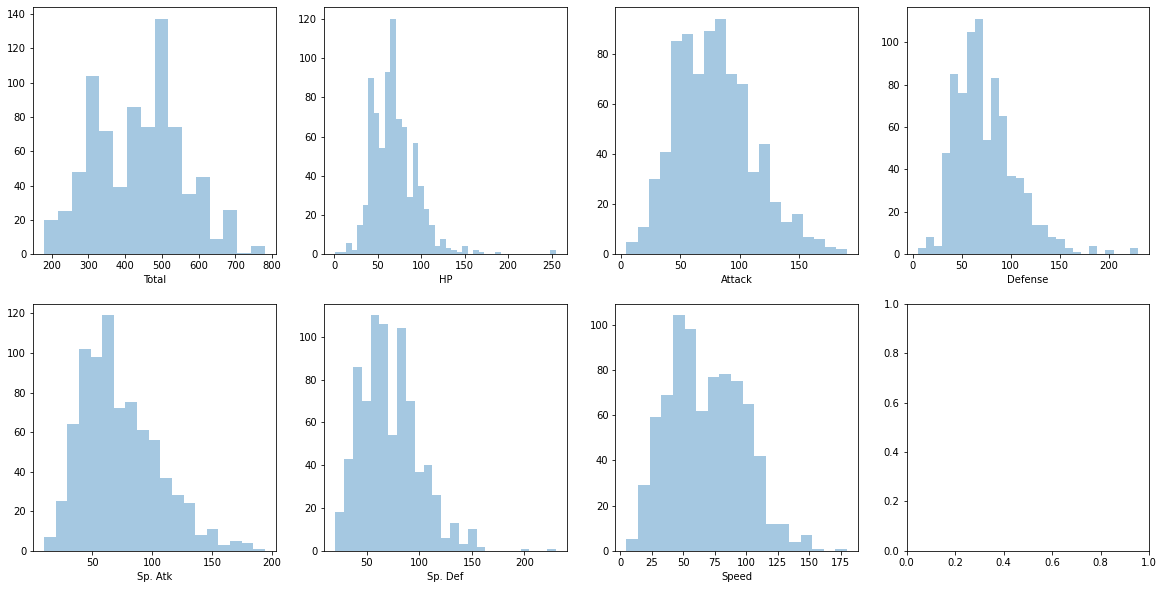

In [7]:
numerical = df.iloc[:,4:11]
fig, axes = plt.subplots(2,4, figsize=(20,10))
a = 0
b = 0
for col in numerical.columns:
    sns.distplot(numerical[col], ax = axes[a][b], kde=False )
    b+=1
    if b == 4:
        b = 0
        a += 1

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Legendary', ylabel='count'>

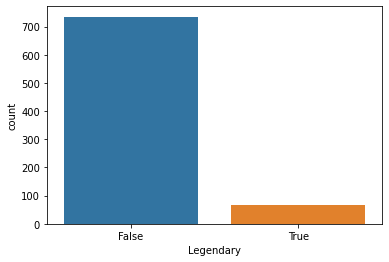

In [8]:
sns.countplot(df["Legendary"])

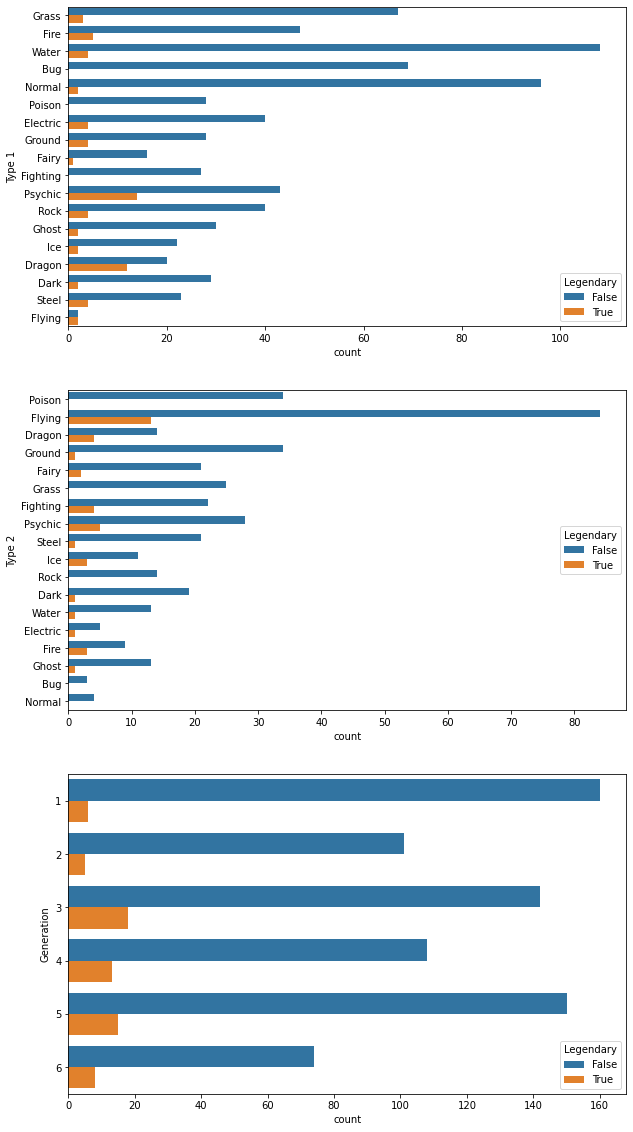

In [9]:
categorical = df[["Type 1", "Type 2", "Generation", "Legendary"]]


fig, axes = plt.subplots(3, figsize=(10,20))
# a = 0
b = 0
for col in categorical.columns:
    if col == "Legendary":
        break
    sns.countplot(y = categorical[col], hue= "Legendary", data = df, ax = axes[b])
#     axes[a][b].set_xticklabels(axes[a][b].get_xticklabels(), rotation=90)
    b+=1
# ax = sns.countplot(df["Type 1"])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<AxesSubplot:xlabel='Total', ylabel='Attack'>

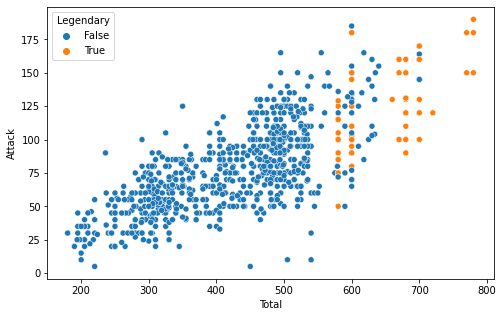

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total", y="Attack", hue="Legendary", data=df)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Generation', ylabel='Total'>

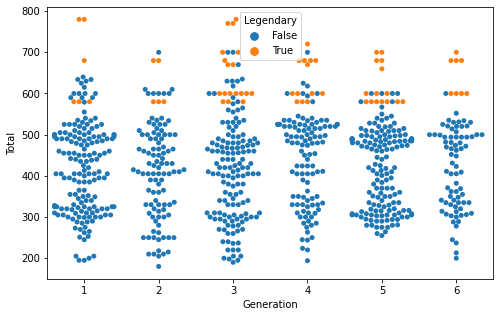

In [11]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="Generation", y="Total", hue="Legendary", data=df)

In [12]:
from sklearn.preprocessing import LabelEncoder  #For convert categorical feature into number
le = LabelEncoder()
df["Type 1"] = le.fit_transform(df["Type 1"])
df["Type 2"] = df["Type 2"].fillna("Null") #Remove NaN values
df["Type 2"] = le.fit_transform(df["Type 2"])
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,14,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,9,14,405,60,62,63,80,80,60,1,False
2,3,Venusaur,9,14,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,9,14,625,80,100,123,122,120,80,1,False
4,4,Charmander,6,13,309,39,52,43,60,50,65,1,False


<AxesSubplot:>

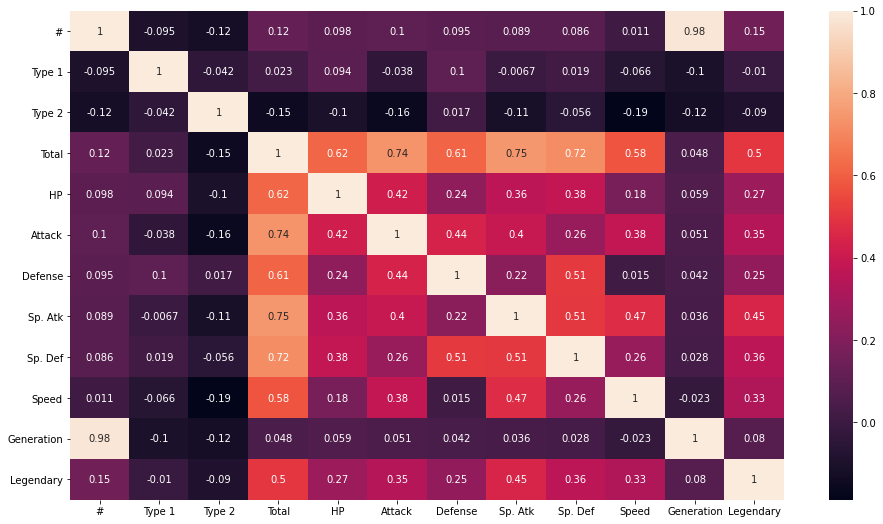

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot = True)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(['Name', 'Legendary'], axis = 1)
y = df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #Split dataset into train and test set

In [15]:
result = dict()

In [16]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)
res = logR.score(X_test, y_test)*100
print(res)

result["logR(NP)"] = res

88.75


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 로지스틱 회귀

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics

In [18]:

col_trans = make_column_transformer(
            (OneHotEncoder(),['Type 1', 'Type 2', 'Generation']), #One Hot Encoder, re labelling type columns, because i heard that one hot encoder works better
            (StandardScaler(),['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']), #Scaling numeric data, so the training proccess will be better and faster
            remainder = 'passthrough') #Not doing anything for the rest of columns

In [19]:
pipe = make_pipeline(col_trans,logR)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

res = pipe.score(X_test, y_test)*100
print(res)
result["logR(P)"] = res

92.5


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [21]:
#SVM
from sklearn.svm import SVC

svm_model = SVC()
pipe = make_pipeline(col_trans, svm_model)
pipe.fit(X_train, y_train)
res = pipe.score(X_test, y_test)*100

print(res)
result["SVM"] = res
# y_pred = pipe.predict(X_test)
# print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

90.625
